# AI SATURDAYS FINAL PROJECT


# Customer Segmentation 

## Problem Statement

To analyze the content of an E-commerce database that lists purchases made by  ∼∼ 4000 customers over a period of one year (from 2010/12/01 to 2011/12/09). Based on this analysis, you will develop a model that allows the store owner to anticipate the purchases that will be made by a new customer, during the following year.

The customers’ dataset descriptions include 8 variables:

•	InvoiceNo: This is the Invoice Number, which is a 6-digit integer uniquely assigned to each transaction. 
•	StockCode: This is the unique Product Code, which is a 5-digit integer assigned to each item on sale.
•	Description: This is the Product Name of the items on sale.
•	Quantity: It’s a numeric variable representing the quantities of each item sold per transaction.
•	InvoiceDate: This indicates the Invoice Date and time when each transaction was carried out.
•	UnitPrice: This is the Product Price per unit in sterling.
•	CustomerID: This is a 5-digit Customer Identification number assigned to each customer.
•	Country: This is the name of the country where each customer resides.

In this machine learning project, we will explore the data and perform one of the applications of machine learning – Customer Segmentation. We will implement it through K-means algorithm and RFM Analysis using Python language. 


In [1]:
# Import libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import itertools
from pathlib import Path
import seaborn as sns

import random 
import datetime as dt
import re
import pickle
import nltk, warnings
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import digits, punctuation


from scipy.stats import chi2_contingency

from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from wordcloud import WordCloud, STOPWORDS

warnings.filterwarnings("ignore")
plt.style.use('bmh')
%matplotlib inline
import os


In [2]:
# Import data containing the transactions from 01/12/2010 and 09/12/2011

data = pd.read_csv(r"C:\Users\oluma\Downloads\data 2.csv", encoding="ISO-8859-1", dtype={'CustomerID': str,'InvoiceID': str})

# EDA

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  object 
 7   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 33.1+ MB


Let's find out if there are missing values.

Text(0.5, 1.0, 'Visualization of Missing Values per Columns')

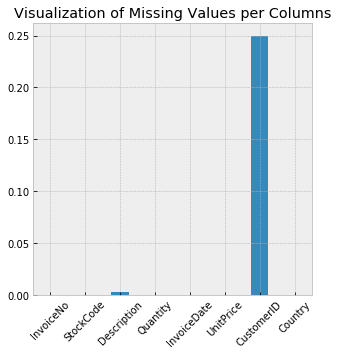

In [7]:
# Bar plot of missing values
plt.figure(figsize=(5, 5))
data.isnull().mean(axis=0).plot.bar(rot=45)
plt.title("Visualization of Missing Values per Columns")

From the plot, we can see that there are missing values in the 'Description' and 'CustomerID' columns.

In [8]:
# Check the first 5 rows of the dataset
nan_rows = data[data.isnull().T.any().T]
nan_rows.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [9]:
# Check the sum of missing values in the dataset
data.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

We have 135080 nan values in the CustomerID column and 1454 nan values in the Description column. 

Let's try to input the values for the CustomerID by looking at the InvoiceNo.

In [10]:
data[data['InvoiceNo']== '536414']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom


In [11]:
data[data['InvoiceNo']== '536544'][:5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom


It appears that we can't replace the missing values with the data available. So we'll drop the missing values in the CustomerID column.

In [12]:
# Remove missing values from CustomerID column
data = data.dropna(subset=["CustomerID"])

Let's confirm if there are still any missing values.

Text(0.5, 1.0, 'Visualization of Missing values per column')

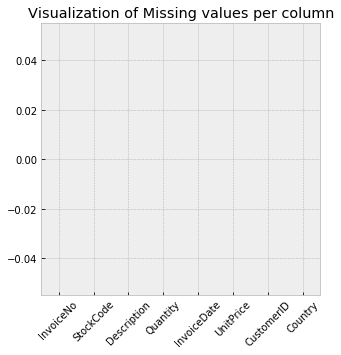

In [13]:
plt.figure(figsize=(5, 5))
data.isnull().mean(axis=0).plot.bar(rot=45)
plt.title("Visualization of Missing values per column")

There are no more missing values. Now, we'll check for duplicate values, and if there's any, we'd drop them.

In [14]:
print('Duplicate values: {}'.format(data.duplicated().sum()))
data.drop_duplicates(inplace=True)

Duplicate values: 5225


We can see that there's a need to take account of duplicate values while exploring the data.

## Country

Let's start by exploring the Country column.

In [15]:
countries = data['Country'].value_counts()
print('Total Number of Resident Countries of all the Customers: {}'.format(len(countries)))

Total Number of Resident Countries of all the Customers: 37


As at the time this data was collected, the ecommerce store had customers from 37 countries.

In [18]:
# Customer distribution by country
customer_country = data[['Country','CustomerID']].drop_duplicates()
customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index(drop=False).sort_values('CustomerID', ascending=False)

,Country,CustomerID
35,United Kingdom,3950
14,Germany,95
13,France,87
30,Spain,31
3,Belgium,25
32,Switzerland,21
26,Portugal,19
18,Italy,15
12,Finland,12
1,Austria,11


We can see that customers from the United Kingdom had the most representation with over 3950 orders. Now let's explore 'Quantity' column.

## Quantity

In [15]:
# Check the descriptive analysis
data.describe()

,Quantity,UnitPrice
count,401604.000000,401604.000000
mean,12.183273,3.474064
std,250.283037,69.764035
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


This shows that there are negative values in the 'Quantity' column. Let's explore this column for more details.

In [16]:
data[(data['Quantity']<0)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548,United Kingdom


From this table, we can see that:

- The stock code values is a mix of numerical, alphabetical and alphanumeric values. We can see a 'D' value which could mean Discount
- The InvoiceNo aren't also only numerical since there is a C before the other numbers for every negative value in the quantity column, this could mean that the order was canceled.

Let's analyse the InvoiceNo to find any patterns.

## InvoiceNo - Cancelation Code

In [17]:
# Creating a new variable 
temp = data.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
n_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})

In [18]:
# Locating canceled orders
n_products_per_basket.InvoiceNo = n_products_per_basket.InvoiceNo.astype(str)
n_products_per_basket['order_canceled'] = n_products_per_basket['InvoiceNo'].apply(lambda x:int('C' in x))
display(n_products_per_basket[:5])

# Calculating the percentage of orders canceled
n1 = n_products_per_basket['order_canceled'].sum()
n2 = n_products_per_basket.shape[0]
print('Number of orders canceled: {}/{} ({:.2f}%) '.format(n1, n2, n1/n2*100))

,CustomerID,InvoiceNo,Number of products,order_canceled
0,12346,541431,1,0
1,12346,C541433,1,1
2,12347,537626,31,0
3,12347,542237,29,0
4,12347,549222,24,0


Number of orders canceled: 3654/22190 (16.47%) 


Over 16% of the total number of transactions were canceled, which is quite a significant amount. Let's take a look at some of the cancelled transactions.

In [19]:
n_products_per_basket[n_products_per_basket['order_canceled']==1][:5]

,CustomerID,InvoiceNo,Number of products,order_canceled
1,12346,C541433,1,1
23,12352,C545329,2,1
24,12352,C545330,1,1
25,12352,C547388,7,1
39,12359,C549955,2,1


In [20]:
# Explore the first canceled order on the table with CustomerID 12346
data[data['CustomerID'] == '12346']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,1/18/2011 10:17,1.04,12346,United Kingdom


From the above table, there appears to be counterpart of the canceled order in the database.
Let's see if there are other counterparts.

In [21]:
test = data[data['Quantity'] < 0][['CustomerID','Quantity',
                                                   'StockCode','Description','UnitPrice']]
for index, col in  test.iterrows():
    if data[(data['CustomerID'] == col[0]) & (data['Quantity'] == -col[1]) 
                & (data['Description'] == col[2])].shape[0] == 0: 
        print(test.loc[index])
        print('Our hypothesis is wrong')
        break

CustomerID        14527
Quantity             -1
StockCode             D
Description    Discount
UnitPrice          27.5
Name: 141, dtype: object
Our hypothesis is wrong


Let's explore CustomerID 14527 for more details.

In [22]:
data[data['CustomerID'] == '14527'].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527,United Kingdom
8963,537159,22112,CHOCOLATE HOT WATER BOTTLE,6,12/5/2010 13:17,4.95,14527,United Kingdom
8964,537159,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/5/2010 13:17,4.95,14527,United Kingdom
8965,537159,21479,WHITE SKULL HOT WATER BOTTLE,1,12/5/2010 13:17,3.75,14527,United Kingdom
8966,537159,22114,HOT WATER BOTTLE TEA AND SYMPATHY,6,12/5/2010 13:17,3.95,14527,United Kingdom


It appears that when there is a discount there are no counterparts. Let's discard the Discount values and try again.

In [23]:
data_check = data[(data['Quantity'] < 0) & (data['Description'] != 'Discount')][
                                 ['CustomerID','Quantity','StockCode',
                                  'Description','UnitPrice']]

for index, col in  data_check.iterrows():
    if data[(data['CustomerID'] == col[0]) & (data['Quantity'] == -col[1]) 
                & (data['Description'] == col[2])].shape[0] == 0: 
        print(index, data_check.loc[index])
        print('The second hypothesis is also wrong')
        break

154 CustomerID                               15311
Quantity                                    -1
StockCode                               35004C
Description    SET OF 3 COLOURED  FLYING DUCKS
UnitPrice                                 4.65
Name: 154, dtype: object
The second hypothesis is also wrong


Let's explore CustomerID 15311 for more details.

In [24]:
data[(data['CustomerID'] == '15311') & (data['Description'] == 'SET OF 3 COLOURED  FLYING DUCKS')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311,United Kingdom
9200,537195,35004C,SET OF 3 COLOURED FLYING DUCKS,12,12/5/2010 13:55,4.65,15311,United Kingdom
18196,C537805,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/8/2010 13:18,4.65,15311,United Kingdom
28630,538651,35004C,SET OF 3 COLOURED FLYING DUCKS,12,12/13/2010 15:07,4.65,15311,United Kingdom
39381,C539640,35004C,SET OF 3 COLOURED FLYING DUCKS,-3,12/20/2010 15:27,4.65,15311,United Kingdom
44157,540157,35004C,SET OF 3 COLOURED FLYING DUCKS,12,1/5/2011 11:41,4.65,15311,United Kingdom
59542,541293,35004C,SET OF 3 COLOURED FLYING DUCKS,12,1/17/2011 13:39,4.65,15311,United Kingdom
78333,C542866,35004C,SET OF 3 COLOURED FLYING DUCKS,-2,2/1/2011 12:14,4.65,15311,United Kingdom


Once more, we confirm that our initial hypothesis is wrong. Hence, cancelled orders does not necessarily mean that the orders would have been made beforehand. It also means that the customer may have only cancelled only a part of the transaction.

In [25]:
df_cleaned = data.copy(deep = True)
df_cleaned['QuantityCanceled'] = 0

entry_to_remove = []
doubtfull_entry = []

for index, col in  data.iterrows():
    if (col['Quantity'] > 0) or col['Description'] == 'Discount': continue        
    df_test = data[(data['CustomerID'] == col['CustomerID']) &
                         (data['StockCode']  == col['StockCode']) & 
                         (data['InvoiceDate'] < col['InvoiceDate']) & 
                         (data['Quantity']   > 0)].copy()
    
    # Cancelation WITHOUT counterpart
    if (df_test.shape[0] == 0): 
        doubtfull_entry.append(index)
    
    # Cancelation WITH a counterpart
    elif (df_test.shape[0] == 1): 
        index_order = df_test.index[0]
        df_cleaned.loc[index_order, 'QuantityCanceled'] = -col['Quantity']
        entry_to_remove.append(index)        
    
    # If various counterparts exist in orders, then we delete the last one
    elif (df_test.shape[0] > 1): 
        df_test.sort_index(axis=0 ,ascending=False, inplace = True)        
        for ind, val in df_test.iterrows():
            if val['Quantity'] < -col['Quantity']: continue
            df_cleaned.loc[ind, 'QuantityCanceled'] = -col['Quantity']
            entry_to_remove.append(index) 
            break    

In the above function, we checked for two cases:

- if there are canceled orders that exists without counterparts
- if there's at least one counterpart with the exact same quantity

The index of the corresponding canceled order are respectively kept in the doubtfull_entry and entry_to_remove lists whose sizes are:

In [26]:
print("entry_to_remove: {}".format(len(entry_to_remove)))
print("doubtfull_entry: {}".format(len(doubtfull_entry)))

entry_to_remove: 6151
doubtfull_entry: 2607


Among these entries, the lines listed in the doubtfull_entry list correspond to the entries indicating a cancellation but for which there is no command beforehand. 

Now, we'd delete these entries from the dataframe and check the number of entries that correspond to cancellations that have not been deleted with the previous filter:

In [27]:
# Drop the entries in doubtfull_entry and entry_to_remove
df_cleaned.drop(entry_to_remove, axis = 0, inplace = True)
df_cleaned.drop(doubtfull_entry, axis = 0, inplace = True)

# Check if there are still any canceled orders 
remaining_entries = df_cleaned[(df_cleaned['Quantity'] < 0) & (df_cleaned['StockCode'] != 'D')]
print("number of entries to delete: {}".format(remaining_entries.shape[0]))
remaining_entries[:5]

number of entries to delete: 37


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
27329,C538530,22630,DOLLY GIRL LUNCH BOX,-33,12/13/2010 10:26,1.95,14796,United Kingdom,0
32870,C539195,22942,CHRISTMAS LIGHTS 10 SANTAS,-5,12/16/2010 12:05,8.50,12748,United Kingdom,0
33085,C539221,22941,CHRISTMAS LIGHTS 10 REINDEER,-12,12/16/2010 12:56,8.50,14911,EIRE,0
33086,C539221,22942,CHRISTMAS LIGHTS 10 SANTAS,-10,12/16/2010 12:56,8.50,14911,EIRE,0
77599,C542744,22700,BLACK AND WHITE DOG BOWL,-10,1/31/2011 16:32,0.85,16191,United Kingdom,0


There are still 37 transactions to be removed.

In [28]:
# Drop the remaining entries
df_cleaned.drop(remaining_entries.index, axis = 0, inplace = True)

### Stockcode

In [29]:
list_special_codes = df_cleaned[df_cleaned['StockCode'].str.contains('^[a-zA-Z]+', regex=True)]['StockCode'].unique()
list_special_codes

array(['POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT'],
      dtype=object)

We found some operations ('POST', 'D', 'C2', 'M', 'BANK CHARGES', 'PADS', 'DOT') that does not characterize the store's customers. So we will just drop these transactions from our database

In [30]:
# Clean the entries in the StockCode column
df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'POST']
df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'D']
df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'C2']
df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'M']
df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'BANK CHARGES']
df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'PADS']
df_cleaned = df_cleaned[df_cleaned['StockCode']!= 'DOT']

### Outliers

Let's check for outliers in our data.

In [31]:
# Check the descriptive analysis
df_cleaned.describe()

,Quantity,UnitPrice,QuantityCanceled
count,391183.000000,391183.000000,391183.000000
mean,13.179665,2.874130,0.583911
std,181.907403,4.284639,175.868790
min,1.000000,0.000000,0.000000
25%,2.000000,1.250000,0.000000
50%,6.000000,1.950000,0.000000
75%,12.000000,3.750000,0.000000
max,80995.000000,649.500000,80995.000000


The minimum value for the unitprice is 0. Let's find out why it is so.

In [32]:
df_cleaned[(df_cleaned['UnitPrice'] == 0)].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647,Germany,0
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560,United Kingdom,0
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911,EIRE,0
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081,United Kingdom,0
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081,United Kingdom,0


These null values might mean that the customers were given a special discount, so we won't alter them. 

Now, let's remove the items that were canceled in order to do away with outliers and inconsistent values.

## Feature engineering

In [33]:
def unique_counts(data):
   for i in data.columns:
       count = data[i].nunique()
       print(i, ": ", count)
unique_counts(df_cleaned)

InvoiceNo :  18405
StockCode :  3659
Description :  3871
Quantity :  300
InvoiceDate :  17169
UnitPrice :  356
CustomerID :  4335
Country :  37
QuantityCanceled :  115


### Total Amount

In [34]:
# Calculate the Total Amount 
df_cleaned['TotalAmount'] = df_cleaned['UnitPrice'] * (df_cleaned['Quantity'] - df_cleaned['QuantityCanceled'])

With the above line of code, we created a new column for the total amount spent for each transaction. 

Now let's calculate the total revenue generated by each country.

Text(0.5, 1.0, 'Revenue per Country')

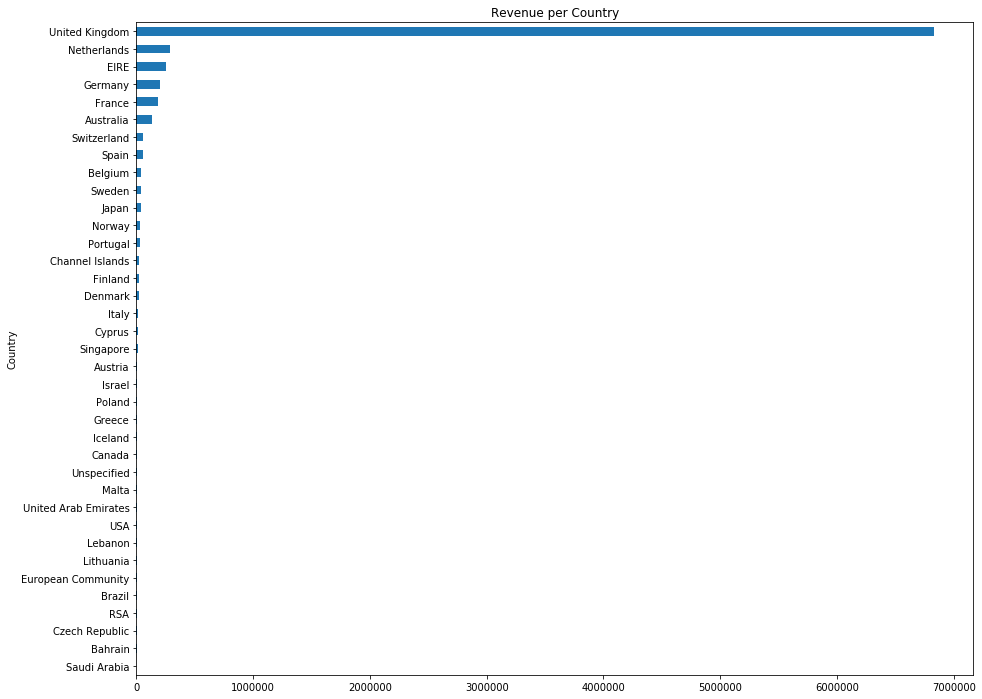

In [36]:
# Total revenue generated per country
revenue_per_country = df_cleaned.groupby(["Country"])["TotalAmount"].sum().sort_values()
revenue_per_country.plot(kind='barh', figsize=(15,12))
plt.title("Revenue per Country")

We can see that the United Kingdom generated the most revenue, with close to 7 million dollars.

Text(0.5, 1.0, 'Number of Invoices per Country')

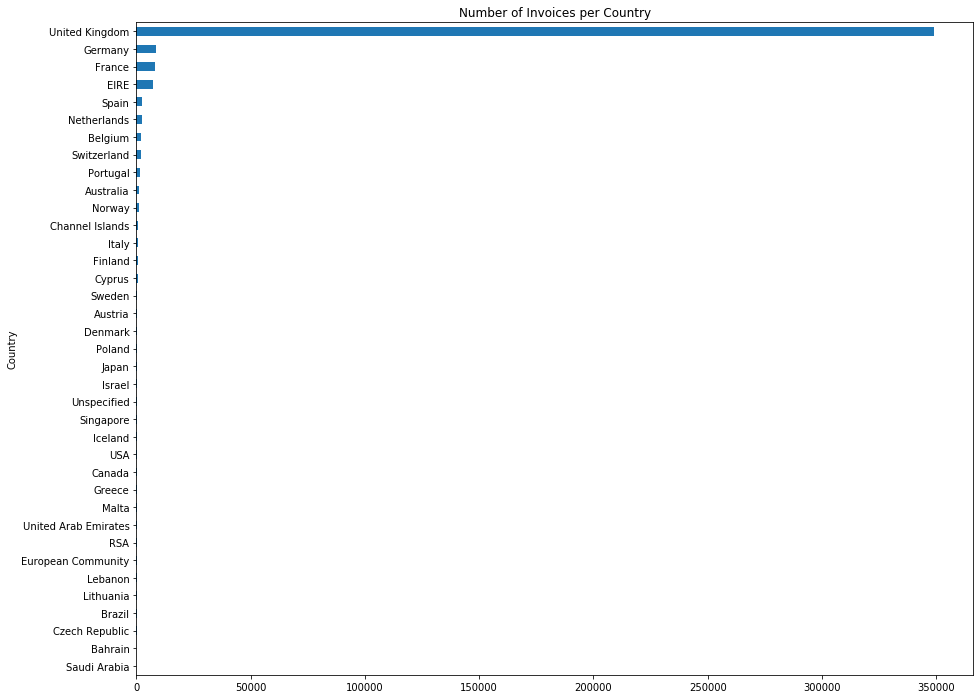

In [37]:
# Number of Invoices received per country
No_invoice_per_country = df_cleaned.groupby(["Country"])["InvoiceNo"].count().sort_values()
No_invoice_per_country.plot(kind='barh', figsize=(15,12))
plt.title("Number of Invoices per Country")

Here, Netherlands had lower invoices and holds the 6th position.
This is very interesting since Netherlands held the 2nd position in terms of revenue even though it had only 9 customers (Check the plot of Customer Distribution by Country). 

Germany (95 customers) and France (87 customers) had more invoices with almost 10 times more customers than Netherlands but generated lesser revenue compared to Netherlands.

In [48]:
# Normalize the labels
le = preprocessing.LabelEncoder()
le.fit(df_cleaned['Country'])

LabelEncoder()

In [49]:
le.classes_

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36], dtype=int64)

In [50]:
df_cleaned['Country'] = le.transform(df_cleaned['Country'])

In [51]:
df_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,35,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,35,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,35,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,35,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,35,0,20.34


### RFM Modeling

Here, we will use RFM analysis, which is a customer segmentation technique that groups customers based on their transaction history. 

RFM stands for Recency, Frequency and Monetary. 

In [52]:
df_cleaned['InvoiceDate'].min()

'1/10/2011 10:32'

In [53]:
df_cleaned['InvoiceDate'].max()

'9/9/2011 9:52'

In [55]:
import datetime as dt

# Recency = Latest Date - Last Inovice Data
# Set latest date to be one day after the last entry in the databse
Latest_Date = dt.datetime(2011,12,10)
df_cleaned['InvoiceDate'] = pd.to_datetime(df_cleaned['InvoiceDate'])

In [65]:
#Create RFM Modelling scores for each customer
RFMScores = df_cleaned.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotalAmount': lambda x: x.sum()})

#Convert Invoice Date into type int
RFMScores['InvoiceDate'] = RFMScores['InvoiceDate'].astype(int)

#Rename column names to Recency, Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalAmount': 'Monetary'}, inplace=True)

RFMScores.reset_index().head()


,CustomerID,Recency,Frequency,Monetary
0,12346,325,1,0.00
1,12347,2,182,4310.00
2,12348,75,27,1437.24
3,12349,18,72,1457.55
4,12350,310,16,294.40


Let's check the transaction details of a random customer

In [66]:
random_customer = df_cleaned[df_cleaned['CustomerID']=='12747']
random_customer.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,QuantityCanceled,TotalAmount
9754,537215,85124C,GREEN JUICY FRUIT PHOTO FRAME,12,2010-12-05 15:38:00,2.55,12747,35,0,30.60
9755,537215,85124B,BLUE JUICY FRUIT PHOTO FRAME,6,2010-12-05 15:38:00,2.55,12747,35,0,15.30
9756,537215,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2010-12-05 15:38:00,1.69,12747,35,0,27.04
9757,537215,85062,PEARL CRYSTAL PUMPKIN T-LIGHT HLDR,24,2010-12-05 15:38:00,1.65,12747,35,0,39.60
9758,537215,85064,CREAM SWEETHEART LETTER RACK,6,2010-12-05 15:38:00,5.45,12747,35,0,32.70


In [68]:
quantiles = RFMScores.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 98.0},
 'Monetary': {0.25: 299.655, 0.5: 653.24, 0.75: 1611.6999999999998}}

In [69]:
segmented_rfm = RFMScores

In [70]:
# Functions to create R, F and M segments
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

Here we'll apply a score on each feature of RFM.

In [71]:
segmented_rfm['r_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Recency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['Monetary'].apply(FMScore, args=('Recency',quantiles,))
segmented_rfm.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346,325,1,0.00,4,4,4
12347,2,182,4310.00,1,1,1
12348,75,27,1437.24,3,3,1
12349,18,72,1457.55,2,2,1
12350,310,16,294.40,4,4,1


Finally we'll set a score for each customer in the database.

In [72]:
segmented_rfm['RFMScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str) + segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
12346,325,1,0.00,4,4,4,444
12347,2,182,4310.00,1,1,1,111
12348,75,27,1437.24,3,3,1,331
12349,18,72,1457.55,2,2,1,221
12350,310,16,294.40,4,4,1,441


In [74]:
segmented_rfm[segmented_rfm['RFMScore']=='111'].sort_values('Monetary', ascending=False)

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
14646,1,2064,278742.02,1,1,1,111
18102,0,431,259657.30,1,1,1,111
17450,8,336,193417.63,1,1,1,111
14911,1,5586,131009.71,1,1,1,111
14156,9,1382,113728.45,1,1,1,111
...,...,...,...,...,...,...,...
13838,5,165,674.82,1,1,1,111
13596,5,146,664.11,1,1,1,111
16442,1,171,609.30,1,1,1,111


Here we have an example of customers with a score of 111 which means that they are classified as our best customers.

In [75]:
segmented_rfm.head()

,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMScore
CustomerID,,,,,,,
12346,325,1,0.00,4,4,4,444
12347,2,182,4310.00,1,1,1,111
12348,75,27,1437.24,3,3,1,331
12349,18,72,1457.55,2,2,1,221
12350,310,16,294.40,4,4,1,441


In [76]:
segmented_rfm = segmented_rfm.reset_index()

In [77]:
segmented_rfm.head()

,CustomerID,Recency,Frequency,Monetary,r_quartile,f_quartile,m_quartile,RFMScore
0,12346,325,1,0.00,4,4,4,444
1,12347,2,182,4310.00,1,1,1,111
2,12348,75,27,1437.24,3,3,1,331
3,12349,18,72,1457.55,2,2,1,221
4,12350,310,16,294.40,4,4,1,441


In [78]:
df_cleaned = pd.merge(df_cleaned,segmented_rfm, on='CustomerID')

In [79]:
df_cleaned.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'QuantityCanceled', 'TotalAmount',
       'Recency', 'Frequency', 'Monetary', 'r_quartile', 'f_quartile',
       'm_quartile', 'RFMScore'],
      dtype='object')

We don't need the quartiles anymore, so we'd drop them.

In [80]:
df_cleaned = df_cleaned.drop(columns=['r_quartile', 'f_quartile', 'm_quartile'])

### Time Features

In [ ]:
# df_cleaned['Month'] = df_cleaned["InvoiceDate"].map(lambda x: x.month)

In [ ]:
# df_cleaned['Month'].value_counts()

In [ ]:
# df_cleaned['Weekday'] = df_cleaned["InvoiceDate"].map(lambda x: x.weekday())
# df_cleaned['Day'] = df_cleaned["InvoiceDate"].map(lambda x: x.day)
# df_cleaned['Hour'] = df_cleaned["InvoiceDate"].map(lambda x: x.hour)

In [85]:
# df_cleaned.head()

**Product categories**

In the dataframe, products are uniquely identified through the StockCode variable. A shrort description of the products is given in the Description variable. Let's group the products into different categories.

In [88]:
import nltk
nltk.download('stopwords')
X = df_cleaned["Description"].unique()

stemmer = nltk.stem.porter.PorterStemmer()
stopword = nltk.corpus.stopwords.words('english')

def stem_and_filter(doc):
    tokens = [stemmer.stem(w) for w in analyzer(doc)]
    return [token for token in tokens if token.isalpha()]

analyzer = TfidfVectorizer().build_analyzer()
CV = TfidfVectorizer(lowercase=True, stop_words="english", analyzer=stem_and_filter, min_df=0.00, max_df=0.3)  # we remove words if it appears in more than 30 % of the corpus (not found stopwords like Box, Christmas and so on)
TF_IDF_matrix = CV.fit_transform(X)
print("TF_IDF_matrix :", TF_IDF_matrix.shape, "of", TF_IDF_matrix.dtype)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oluma\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


TF_IDF_matrix : (3871, 1694) of float64


In [89]:
svd = TruncatedSVD(n_components = 100)
normalizer = Normalizer(copy=False)

TF_IDF_embedded = svd.fit_transform(TF_IDF_matrix)
TF_IDF_embedded = normalizer.fit_transform(TF_IDF_embedded)
print("TF_IDF_embedded :", TF_IDF_embedded.shape, "of", TF_IDF_embedded.dtype)

TF_IDF_embedded : (3871, 100) of float64


# Model Building

In order to define (approximately) the number of clusters that best represents the data, we would use the silhouette score:

In [90]:
score_tfidf = []

x = list(range(5, 155, 10))

for n_clusters in x:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
    kmeans.fit(TF_IDF_embedded)
    clusters = kmeans.predict(TF_IDF_embedded)
    silhouette_avg = silhouette_score(TF_IDF_embedded, clusters)

    rep = np.histogram(clusters, bins = n_clusters-1)[0]
    score_tfidf.append(silhouette_avg)

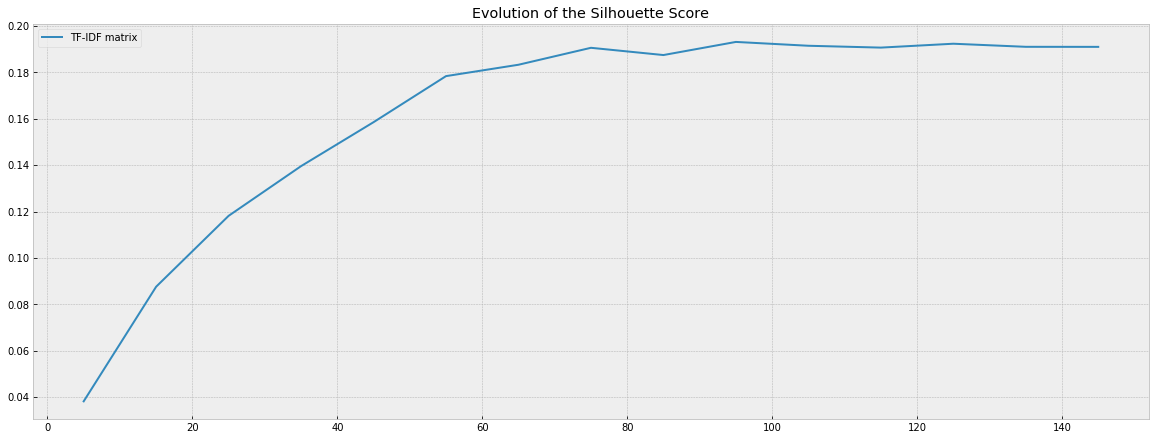

In [91]:
plt.figure(figsize=(20,16))

plt.subplot(2, 1, 1)
plt.plot(x, score_tfidf, label="TF-IDF matrix")
plt.title("Evolution of the Silhouette Score")
plt.legend()

The highest value for the silhouette score is when there are 135 clusters. So we'll chose this value.

Text(0.5, 1.0, 'ACP with 135 clusters')

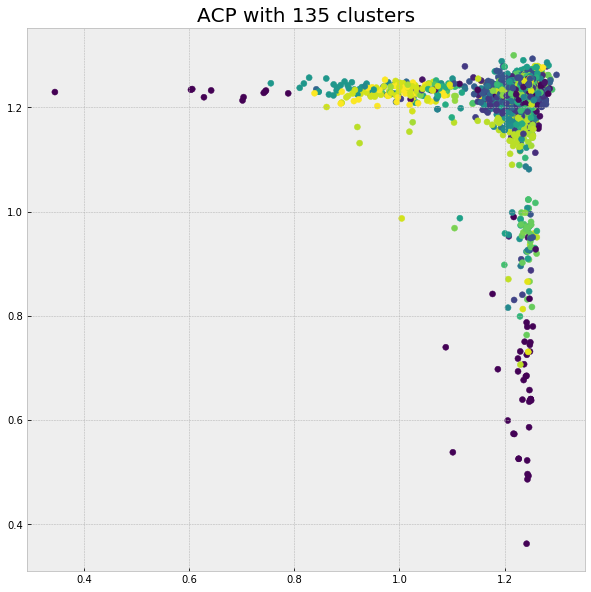

In [92]:
n_clusters = 135

kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30, random_state=0)
proj = kmeans.fit_transform(TF_IDF_embedded)
clusters = kmeans.predict(TF_IDF_embedded)
plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("ACP with 135 clusters", fontsize="20")

Text(0.5, 1.0, 'Visualization of the clustering with TSNE')

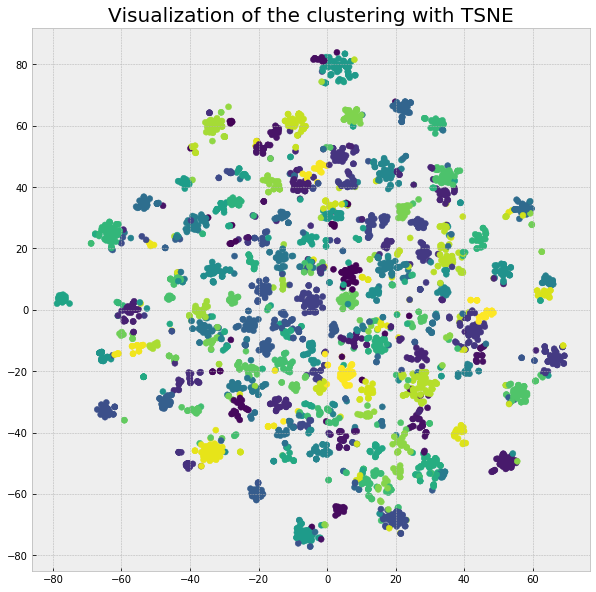

In [93]:
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(TF_IDF_embedded)

plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("Visualization of the clustering with TSNE", fontsize="20")

**Word Cloud**

Now we can have a look at the type of objects that each cluster represents. In order to obtain a global view of their contents, we determine which keywords are the most frequent in each of them.

<Figure size 432x288 with 0 Axes>

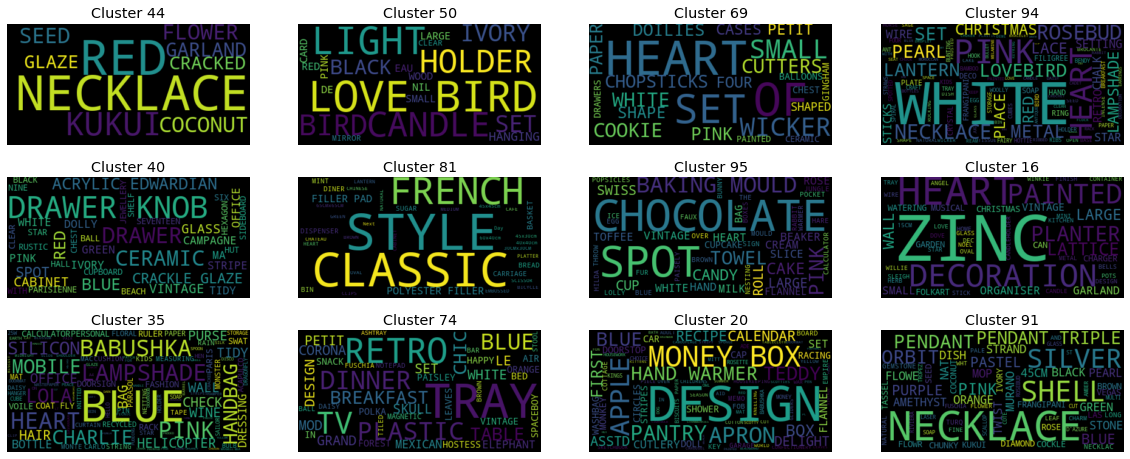

<Figure size 432x288 with 0 Axes>

In [95]:
plt.figure(figsize=(20,8))
wc = WordCloud()

for num, cluster in enumerate(random.sample(range(100), 12)) :
    plt.subplot(3, 4, num+1)
    wc.generate(" ".join(X[np.where(clusters==cluster)]))
    plt.imshow(wc, interpolation='bilinear')
    plt.title("Cluster {}".format(cluster))
    plt.axis("off")
plt.figure()

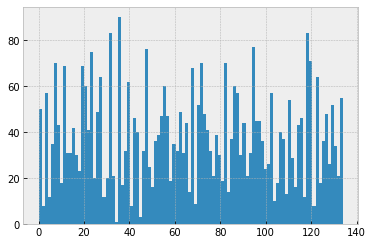

In [96]:
pd.Series(clusters).hist(bins=100)

In [97]:
dict_article_to_cluster = {article : cluster for article, cluster in zip(X, clusters)}

In [98]:
with open('product_clusters.pickle', 'wb') as h:
    pickle.dump(dict_article_to_cluster, h)

## Customer categories

### Grouped by invoices

In [100]:
cluster = df_cleaned['Description'].apply(lambda x : dict_article_to_cluster[x])
df2 = pd.get_dummies(cluster, prefix="Cluster").mul(df_cleaned["TotalAmount"], 0)
df2 = pd.concat([df_cleaned['InvoiceNo'], df2], axis=1)
df2_grouped = df2.groupby('InvoiceNo').sum()

In [101]:
custom_aggregation = {}
custom_aggregation["TotalAmount"] = lambda x:x.iloc[0]
custom_aggregation["Recency"] = lambda x:x.iloc[0]
custom_aggregation["Frequency"] = lambda x:x.iloc[0]
custom_aggregation["Monetary"] = lambda x:x.iloc[0]
custom_aggregation["CustomerID"] = lambda x:x.iloc[0]
custom_aggregation["Quantity"] = "sum"
custom_aggregation["Country"] = lambda x:x.iloc[0]

df_grouped = df_cleaned.groupby("InvoiceNo").agg(custom_aggregation)

### Grouped by customers

In [102]:
df2_grouped_final = pd.concat([df_grouped['CustomerID'], df2_grouped], axis=1).set_index("CustomerID").groupby("CustomerID").sum()
df2_grouped_final = df2_grouped_final.div(df2_grouped_final.sum(axis=1), axis=0)
df2_grouped_final = df2_grouped_final.fillna(0)

In [110]:
custom_aggregation = {}
custom_aggregation["TotalAmount"] = ['min','max','mean']
custom_aggregation["Recency"] = lambda x:x.iloc[0]
custom_aggregation["Frequency"] = lambda x:x.iloc[0]
custom_aggregation["Monetary"] = lambda x:x.iloc[0]
custom_aggregation["Quantity"] = "sum"
custom_aggregation["Country"] = lambda x:x.iloc[0]

df_grouped_final = df_grouped.groupby("CustomerID").agg(custom_aggregation)

In [111]:
df_grouped_final.head()

TotalAmount                    Recency Frequency Monetary Quantity  \
                   min    max       mean <lambda>  <lambda> <lambda>      sum   
CustomerID                                                                      
12346              0.0    0.0   0.000000      325         1     0.00    74215   
12347             13.2   45.0  23.308571        2       182  4310.00     2458   
12348             39.6  150.0  82.840000       75        27  1437.24     2332   
12349             15.0   15.0  15.000000       18        72  1457.55      630   
12350             25.2   25.2  25.200000      310        16   294.40      196   

            Country  
           <lambda>  
CustomerID           
12346            35  
12347            16  
12348            12  
12349            18  
12350            24

In [112]:
df_grouped_final.columns = ["min", "max", "mean", "Recency", "Frequency", "Monetary", "Quantity", "Country"]
df_grouped_final.head()

,min,max,mean,Recency,Frequency,Monetary,Quantity,Country
CustomerID,,,,,,,,
12346,0.0,0.0,0.000000,325,1,0.00,74215,35
12347,13.2,45.0,23.308571,2,182,4310.00,2458,16
12348,39.6,150.0,82.840000,75,27,1437.24,2332,12
12349,15.0,15.0,15.000000,18,72,1457.55,630,18
12350,25.2,25.2,25.200000,310,16,294.40,196,24


In [113]:
df2_grouped_final.head()

,Cluster_0,Cluster_1,Cluster_2,Cluster_3,Cluster_4,Cluster_5,Cluster_6,Cluster_7,Cluster_8,Cluster_9,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
12347,0.003852,0.042877,0.006961,0.0,0.004733,0.0,0.003081,0.00181,0.0,0.106218,...,0.0,0.0,0.0,0.000000,0.004037,0.0,0.033624,0.003132,0.0,0.0
12348,0.000000,0.160307,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,...,0.0,0.0,0.0,0.044251,0.000000,0.0,0.000000,0.000000,0.0,0.0
12349,0.000000,0.027196,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.014751,0.000000,0.0,0.0
12350,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.230299,0.0,0.000000,0.000000,0.0,0.0


## Clustering Customers

In [120]:
# Standardization

X1 = df_grouped_final.values
X2 = df2_grouped_final.values

scaler = StandardScaler()
X1 = scaler.fit_transform(X1)
X_final_std_scale = np.concatenate((X1, X2), axis=1)

## K-Means Clustering

In [121]:
x = list(range(2, 12))
y_std = []
for n_clusters in x:
    print("n_clusters =", n_clusters)
    
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
    kmeans.fit(X_final_std_scale)
    clusters = kmeans.predict(X_final_std_scale)
    silhouette_avg = silhouette_score(X_final_std_scale, clusters)
    y_std.append(silhouette_avg)
    print("The average silhouette_score is :", silhouette_avg, "with Std Scaling")

n_clusters = 2
The average silhouette_score is : 0.9093755148053634 with Std Scaling
n_clusters = 3
The average silhouette_score is : 0.9022379700999896 with Std Scaling
n_clusters = 4
The average silhouette_score is : 0.5796754072553583 with Std Scaling
n_clusters = 5
The average silhouette_score is : 0.4497131160123148 with Std Scaling
n_clusters = 6
The average silhouette_score is : 0.46079689096209026 with Std Scaling
n_clusters = 7
The average silhouette_score is : 0.46234358030513095 with Std Scaling
n_clusters = 8
The average silhouette_score is : 0.4688505101694586 with Std Scaling
n_clusters = 9
The average silhouette_score is : 0.4526611289979252 with Std Scaling
n_clusters = 10
The average silhouette_score is : 0.4589671908383691 with Std Scaling
n_clusters = 11
The average silhouette_score is : 0.4539643584164816 with Std Scaling


We want to have at least 5, 6 clusters so we won't take 2 or 3 clusters even though they have the highest silhouette scores, 8 clusters would fit the best here.


In [122]:
kmeans = KMeans(init='k-means++', n_clusters = 8, n_init=30, random_state=0)  # random state so as to provide cluster numbers during analysis
kmeans.fit(X_final_std_scale)
clusters = kmeans.predict(X_final_std_scale)

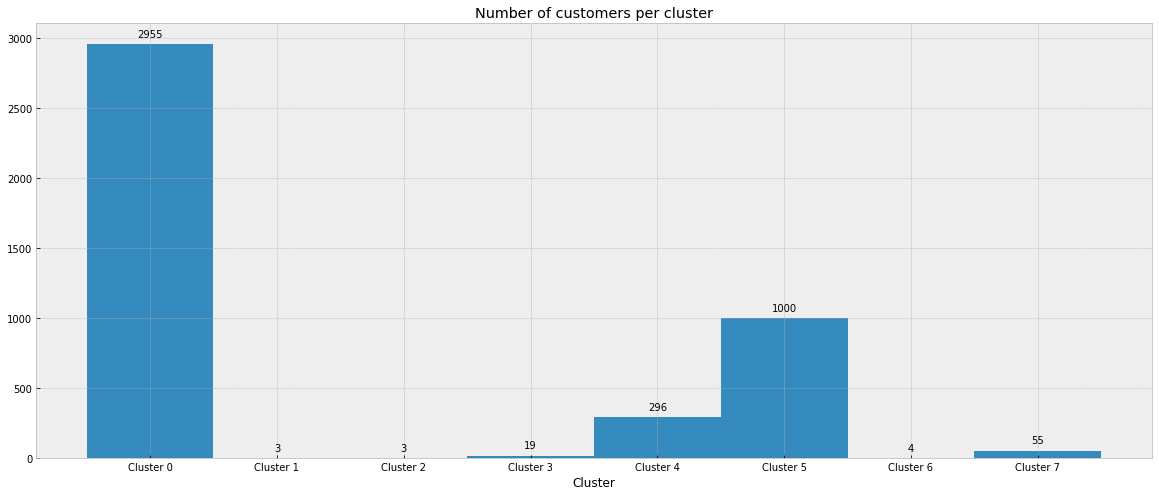

In [123]:
plt.figure(figsize = (20,8))
n, bins, patches = plt.hist(clusters, bins=8)
plt.xlabel("Cluster")
plt.title("Number of customers per cluster")
plt.xticks([rect.get_x()+ rect.get_width() / 2 for rect in patches], ["Cluster {}".format(x) for x in range(8)])

for rect in patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'
    label = str(int(y_value))
    
    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)

In [124]:
df_grouped_final["cluster"] = clusters

In [125]:
final_dataset = pd.concat([df_grouped_final, df2_grouped_final], axis = 1)
final_dataset.head()

,min,max,mean,Recency,Frequency,Monetary,Quantity,Country,cluster,Cluster_0,...,Cluster_125,Cluster_126,Cluster_127,Cluster_128,Cluster_129,Cluster_130,Cluster_131,Cluster_132,Cluster_133,Cluster_134
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,0.000000,325,1,0.00,74215,35,3,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0
12347,13.2,45.0,23.308571,2,182,4310.00,2458,16,4,0.003852,...,0.0,0.0,0.0,0.000000,0.004037,0.0,0.033624,0.003132,0.0,0.0
12348,39.6,150.0,82.840000,75,27,1437.24,2332,12,4,0.000000,...,0.0,0.0,0.0,0.044251,0.000000,0.0,0.000000,0.000000,0.0,0.0
12349,15.0,15.0,15.000000,18,72,1457.55,630,18,4,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.014751,0.000000,0.0,0.0
12350,25.2,25.2,25.200000,310,16,294.40,196,24,5,0.000000,...,0.0,0.0,0.0,0.000000,0.230299,0.0,0.000000,0.000000,0.0,0.0


In [126]:
final_dataset_V2 = final_dataset.reset_index()
final_dataset_V2.to_csv("final_dataset_V2.csv",index=False)

In [127]:
with open('df_cleaned.pickle', 'wb') as f:
    pickle.dump(df_cleaned, f)

## Interpreting the clusters

Text(0.5, 1.0, 'Visualization of the clustering with TSNE')

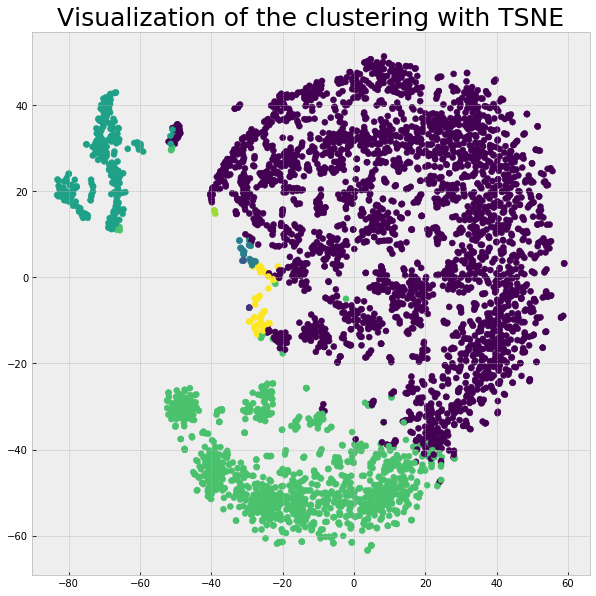

In [128]:
tsne = TSNE(n_components=2)
proj = tsne.fit_transform(X_final_std_scale)

plt.figure(figsize=(10,10))
plt.scatter(proj[:,0], proj[:,1], c=clusters)
plt.title("Visualization of the clustering with TSNE", fontsize="25")

Graphically the clusters are distinctive enough. Let's take a closer look at the clusters that contain few customers.

In [129]:
# Cluster 0

final_dataset[final_dataset['cluster']==0]
final_dataset[final_dataset['cluster']==0].mean()

min             15.049124
max             53.163794
mean            28.638576
Recency         40.851438
Frequency      101.497124
                  ...    
Cluster_130      0.002800
Cluster_131      0.003757
Cluster_132      0.013647
Cluster_133      0.004589
Cluster_134      0.004634
Length: 144, dtype: float64

In [130]:
temp_final_df = final_dataset.reset_index()

In [131]:
cust0 = list(temp_final_df[temp_final_df['cluster']==0]['CustomerID'])

In [133]:
cluster0 = df_cleaned[df_cleaned['CustomerID'].isin(cust0)]
cluster0[['Quantity', 'UnitPrice', 'QuantityCanceled', 'TotalAmount', 'Frequency', 'Recency'
         , 'Monetary']].mean()

Quantity               9.956192
UnitPrice              2.822924
QuantityCanceled       0.104380
TotalAmount           16.390022
Frequency            305.051706
Recency               27.073935
Monetary            3756.264660
dtype: float64

In [134]:
cluster0['Description'].value_counts()[:10]
custom_aggregation = {}
custom_aggregation["Country"] = lambda x:x.iloc[0]
custom_aggregation["RFMScore"] = lambda x:x.iloc[0]

cluster0_grouped = cluster0.groupby("CustomerID").agg(custom_aggregation)

In [135]:
cluster0_grouped['RFMScore'].value_counts()

111    356
221    349
331    343
121    337
231    290
321    280
341    204
131    195
211    174
241    119
141     70
311     63
342     58
242     33
142     21
332     14
232     11
243      8
344      6
411      5
343      5
132      4
143      3
421      3
144      2
324      1
441      1
Name: RFMScore, dtype: int64

In [136]:
cluster0_grouped['Country'].value_counts()

35    2873
30      22
32      15
26      13
24       9
31       6
25       5
33       3
23       3
36       3
29       1
27       1
34       1
Name: Country, dtype: int64

**Cluster 2**

The cluster 2 represents the best customers with a high recency which have around 60 visits, a lot of quantity bought on average, a high moneraty value and also a high frequency around 60 visits. These customers must be taken care.
* Min Basket Price : 13
* Mean Basket Price : 513
* Max Basket Price : 3812
* Quantity            117.083422
* UnitPrice             2.830180
* QuantityCanceled      0.069282
* TotalPrice          258.683970
* frequency            67.812655
* min_recency           1.679039

**Cluster3**

This cluster is full of lost customers. Indeed, as we can see in the month histogramm there are almost no invoices after july. We can see that there are in december but it's december of the past year. So this cluster is pretty bad for datazone, they don't want to have new customers in there. Furthermore they are cheap customers since the mean basket price is 28.91$ ... 



Key figures: 
* Min Basket Price: 24.20
* Mean Basket Price: 28.91
* Max Basket Price: 34.52

* Quantity:            8.25
* UnitPrice:           3.29
* QuantityCanceled:     0.04
* TotalPrice:          15.20
* Frequency             2.606359
* Recency         237.013433

TOP 10 bought products :

* WHITE HANGING HEART T-LIGHT HOLDER:    227
* REGENCY CAKESTAND 3 TIER:              182
* PARTY BUNTING:                         137
* ASSORTED COLOUR BIRD ORNAMENT:         125
* REX CASH+CARRY JUMBO SHOPPER:          103
* SET OF 3 CAKE TINS PANTRY DESIGN:      100
* NATURAL SLATE HEART CHALKBOARD:        100
* JAM MAKING SET WITH JARS:               99
* HEART OF WICKER SMALL:                  98
* HEART OF WICKER LARGE:                  86

**Cluster 4**

This cluster is quiete heterogeneous since there are 17 best customers, 6 lost cheap customers and so on. They do have a high mean basket price of 505 but it's mostly due to the mean quantity they buy (130) because the mean unit price is very low (3.26)

For the time features, what is interesting is that these customers shop less on weekend and they shopped more at the end of the year.

* Min Basket Price : 247
* Mean Basket Price : 505
* Max Basket Price : 1023
* Quantity            130.299145
* UnitPrice             3.264359
* QuantityCancelled      2.332590
* TotalPrice          184.308595

TOP 10 products bought :

* JUMBO BAG RED RETROSPOT :               38
* BLACK RECORD COVER FRAME :            31
* RECORD FRAME 7" SINGLE SIZE :         28
* REGENCY CAKESTAND 3 TIER :           25
* WORLD WAR 2 GLIDERS ASSTD DESIGNS :    24
* WHITE HANGING HEART T-LIGHT HOLDER :   24
* PARTY BUNTING :                        24
* LUNCH BOX I LOVE LONDON :               23
* RED  HARMONICA IN BOX :                23
* CHILLI LIGHTS :                        23

**Cluster 5**

The cluster 5 contains 3 customers which are very much alike. Indeed, they bought only once or twice a few items at a huge quantity. It might be some profesionnals which bought it at discount and will sell back the commodity. Even if they have a high monetary value they're not very interesting for Datazon and we could consider them as lost customers.
* Min Basket Price : 3368
* Mean Basket Price : 3697
* Max Basket Price : 3533
* Quantity            2213.777778
* UnitPrice              2.386667
* QuantityCanceled       0.000000
* TotalPrice          3890.091111
* Frequency              1.666667
* Min_recency          210.888889

**Cluster 6**

What is very specific about this cluster is that there are no customers from UK, it's only foreign countries (Germany, France, Belgium, Italy and Finland).
This cluster is also heterogeneous in terms of RFM since the 2 most represented categories are Best customer and Lost cheap customer. The average basket is very low (33) comparing the ones above but I guess that the more customers we have in a cluster and the more the average customer will be represented which doesn't spent 500$ per transactions like the ones above. 

October and november have the most invoices which isn't surpring approaching Christmas. 

Key figures: 
* Min Basket Price: 20.58
* Mean Basket Price: 33.55
* Max Basket Price: 59.31

* Quantity:            13.785663
* UnitPrice:           2.884687
* QuantityCanceled:     0.057975
* TotalPrice:          23.749951
* Frequency            7.865563
* Recency         46.622343

TOP 10 bought products :

* ROUND SNACK BOXES SET OF4 WOODLAND:     233
* REGENCY CAKESTAND 3 TIER:               161
* PLASTERS IN TIN WOODLAND ANIMALS:       150
* ROUND SNACK BOXES SET OF 4 FRUITS:      146
* RED TOADSTOOL LED NIGHT LIGHT:          144
* PLASTERS IN TIN CIRCUS PARADE:          141
* SPACEBOY LUNCH BOX:                     137
* RABBIT NIGHT LIGHT:                     120
* PLASTERS IN TIN SPACEBOY:               120
* WOODLAND CHARLOTTE BAG:                 111

**Cluster 7**

The cluster 7 contains 19 customers who are considered as best customers since they by the most, very frequently (75) and recently. The difference with cluster 2 is that they cluster 7's customers buy more frequently (75 vs 60) but have a lower monetary value (58000 vs 249000).
They have a mean basket price lower than the other clusters.

* Min Basket Price : 10
* Mean Basket Price : 138
* Max Basket Price : 648
* Quantity            23.257769
* UnitPrice            2.615444
* QuantityCanceled     0.109129
* TotalPrice          34.916436
* Frequency           121.570291
* Recency           2.599109

TOP 10 products bought :

* REGENCY CAKESTAND 3 TIER:              136
* JUMBO BAG RED RETROSPOT:               135
* WHITE HANGING HEART T-LIGHT HOLDER:    121
* CHILLI LIGHTS:                         102
* PAPER BUNTING RETROSPOT:                97
* LUNCH BAG  BLACK SKULL:                95
* GUMBALL COAT RACK:                      93
* LUNCH BAG RED RETROSPOT:                91
* JUMBO BAG PINK POLKADOT:                84
* LUNCH BAG CARS BLUE:                    81

# Conclusion

Let's quickly classify the clusters in terms of importance:

- Cluster 2: high frequency with a lot of quantity (mean basket price of 513) bought on average and high monetary value (VIP clients)
- Cluster 7 : very high purchase frequency with a mean basket price of 150 but good monetary value.
- Cluster 4: very high basket price (huge quantity of products bought on average)
- Cluster 0: good average customers 
- Cluster 6: good foreign customers 
- Cluster 1: almost lost customers
- Cluster 5: highest monetary value but only one or two purchases over the year 
- Cluster 3: lost customers 